##Overview and Abstract

- Team Name: Help
- Group number: Z
- Word count: 1,191
- Link: https://colab.research.google.com/drive/1ESfMpKSl9JFUm1MRfxq2xiGofv_-4UJh#scrollTo=6LEjBUpRtpaG

- Student numbers: Abdulla Hamideh (2020677920), Jan Welz (202073187), Jonathan Miller (202051047), Konstantin Stauffer (202067955), Sotiris Hadjinicolaou (202092702)
- Contribution: everyone has contributed the same amount.
- class number: CS987

- Task 2 - Contract classification

- Executive summary
Task: This report aimed to solve a multi classification problem where you need to predict from the text of the document what industry the document is related to.

The given problem has been changed from a multiclass into a multilabel problem providing a better environment for the models to learn. Models employed in the analysis include Dense-deep, CNN, LSTM, GRU, BILSTM, SVM and BERT. The best performing model was the BERT model based on the pretrained German base-cased with a Kaggle score of 0.94995. 


- Findings

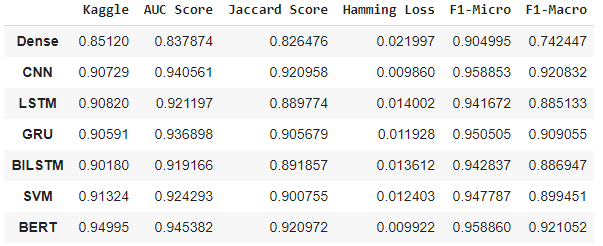


## Method
# Description of the data processing and feature extraction
The problem was presented as a multiclass problem having nine binary categories. Nevertheless, the problem itself could be interpreted as a multilabel problem given the fact that the datapoints are not mutually exclusive, e.g. 10001001, 10100100 each number is representing a certain class. This approach breaks the problem down into 9 classes for each. Hence, this provides a huge advantage in terms of performance for the models. We have processed this with the MultiLabelBinarizer following a similar approach as Francisco Charte et.al (2015) (Francisco Charte et.al 2015, p.1850).


Next, we have dropped every column except the description, title and awarding authority providing the most information for our problem.

Based on the presented reasoning, the combination of the features used is providing more than enough words for the models to be trained on. Based on our analysis, some descriptions are considerably long; thus, we have limited the words to 75 (except for the BERT model 128 because of the different Tokenizer) used as an input to the model to provide a preselection on which information the models should focus on. Furthermore, we created a validation dataset to evaluate the models performance.

Further, we use NLP techniques to transform the data into vectors because the later used models need numerical values. This is done by the following steps:

Preprocssing for any other models than BERT:
  1. Drop stop words & self-defined words  
  2. Remove digits, punctuation ("." , "," , ";" etc.)
- The first two steps are done to get rid of the most common words, symbols etc., which do not add any information.    
  3.1 Using TF-IDF Measure for standard machine learning 
- The tdf-idf measure is a commonly method to assess the relevance of terms in documents of a document collection. E.g. Ramos (2003).
  3.2 For DL Embedding layer 
- We used embedding layers as presented by many publications it is the standard approach for Masato Neishi et. al. (2017), it is shown that embedding layers improve not only translation performance but also convergence time 

Preprocessing for BERT based German cased:
1. BERT-Tokenization with adding special tokens initially setting start and end of the words for one label and splitting long words into smaller tokens. Therefore, we use a longer length.
2. Input-ID for each tokenised description
3. Attention mask for each Input-ID
The process for BERT is following closely the documentation. 

# Description of the support vector machine and why its been chosen
We have selected the support vector machine with it is initial settings being suitable for NLP tasks according to Zainuddin and  Selamat (2014).

# Description of the used models configuration
Much of the selection of the parameters of our models was based on experimenting by choosing the one with the best performance and considering overfitting of the models.
  When configuring the epochs, we plotted the metrics and found out when the model stopped improving. For the batch size, we proceeded similarly heuristically and tried out different ones. In the end, we chose a high batch size because it required less computational power, and the performance did not decrease significantly compared to the smaller batch sizes. The number of layers results from the same procedure, i.e. more layers did not present a higher explanatory power, and the models were only slowed down.

  
  Additionally, some deliberately chosen configurations like the Adam optimizer were also chosen based on the same reasoning as in task 1. Also, we choose binary-cross-entropy as our loss function since we are tackling here a binary classification problem (Daniel Godoy 2018, p.1)
  
  Also, we applied dropout layers with a rate of 0.2 by experimenting. The idea of dropout is that according to the specified dropout rate, some neurons are dropped during training, and so, neurons left in the model are ‘learning’ in a way to be more productive, let us say on their own. This can help models to be more robust and generalize better (Geron,2019).

We used two activation functions, relu and sigmoid, where relu was only used in our CNN model. We used those functions because they are simple, reliable and consistent across different architectures and datasets (Marina Adriana Mercioni 2020, p.1). We always used the Sigmoid function in the Ouput layer since we have a binary class problem.
  
  For BERT we used a different approach building the model entirely in Tensorflow experimenting with different pretrained models (german base cased/uncased, multilingual base uncased). Other than that the model follows the same setting as the other models (activation & loss function, optimizer).

Those are the best configurations of our Models:

1.  Deep-Dense
• Epochs: 20
• Layer: 3
• Batch size: 512

2.  LSTM (see Audrey Tang (2020))
• Epochs: 10
• Layer: 2
• Batch size: 512

3.  GRU (see Vivek Padia (2020))
• Epochs: 10
• Layer: 2
• Batch size: 512

4.  CNN (see Antoine Hue (2020))
• Epochs: 7
• Layer: 2
• Batch size: 512

5.  BILSTM (see Guixian Xu et. Al. (2019))
• Epochs: 3
• Layer: 2
• Batch size: 512

6. BERT (see Horev Rani (2018))
• Pretrained model: German based cased  
• Epochs: 1 at a time to detect overfitting. In total 4x1
• Batch size: 32

7. SVM 
• default settings

#  Description of the training schedule and the approach
1.  Building the model
2.  Run the Model
3.  Evaluate the model with the choosen metrics - loss vs. val loss considering overfitting
4.  Hyperparameter tuning
• Trial and error approach for the parameters: Batch size, Layer and Epochs
5.  Evaluate the model again with the metrics auc and F1 score
6.  Select the best Model

# How we improved our performance
To improve our performance we used appropriate metrics to investigate if the model was improving, underfitting or overfitting to the training data. This was achieved by using the following metrics based on a validation set:
- AUC Score (Area under the ROC-Curve aggregate measure of performance across all possible classification thresholds)
- Jaccard Score (Measure of the similarity of two elements - determined from the tokens)
- Hamming Loss (Measure of the difference of codewords)
- F1-Micro (considers the distribution of the target variable in the data set)


# Results and Discussion
Our chosen models' performance is presented below based on the most suitable features as explained in the method part. While BERT is performing best, it takes a lot of time to be applied to the task; SVM provides performance to training time the best option having the 2nd best score on Kaggle. Dense-Deep performed worst as the architecture limits its usage in such tasks; nevertheless, the score (0.85) is still reasonable. The rest of the models performed around 0.9 on Kaggle, including SVM.

Scores for all models:

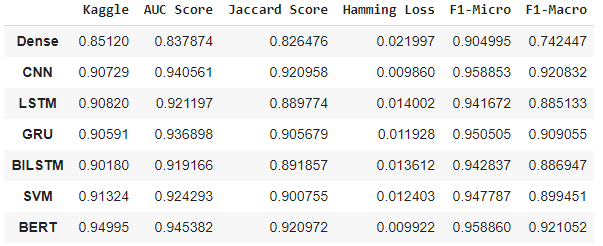



# Summary and Recommendation
BERT (0.94995 on Kaggle) is by far the best model which satisfies a business case and suggest an implementation in a real setting. For further improvements, a larger and more balanced data set could improve the scores. Further, more computational power could  decrease training time. Lastly, SVM has shown to be competitive in comparison with the more complicated and computional heavy neural networks. Hence, it provides a good alternative with the second highest score, which could be improved with hyperparametertuning.


# Refrences

- Antoine Hue (2020): Dense or Convolutional Neural Network

- Aurélien Géron(2019): Hands-on Machine learning with Scikit-Learn, Keras & TensorFlow

- Audrey Tang (2020): An Intuitive Comparison of NLP Models (Neural Networks, RNN, CNN, LSTM)

- Daniel Godoy (2018): Understanding binary cross-entropy / log loss: a visual explanation

- Francisco Charte et.al (2015): LI-MLC: A Label Inference Methodology for Addressing High Dimensionality in the Label Space for Multilabel Classification

- Guixian Xu et. Al. (2019): Sentiment Analysis of Comment Texts Based on BiLSTM

- Horev Rani (2018): BERT Explained: State of the art language model for NLP

- Juan Ramos et.al. (2003): Using TF-IDF to Determine Word Relevance in Document Querie

- Marina Adriana Mercioni (2020): P-Swish: Activation Function with Learnable
Parameters Based on Swish Activation Function in
Deep Learning

- Masato Neishi et. al (2017): A Bag of Useful Tricks for Practical Neural Machine Translation: Embedding Layer Initialization and Large Batch Size

- N. Zainuddin and A. Selamat, "Sentiment analysis using Support Vector Machine," 2014 International Conference on Computer, Communications, and Control Technology (I4CT), Langkawi, Malaysia, 2014, pp. 333-337, doi: 10.1109/I4CT.2014.6914200.

- Paul Pavlidis et. al. (2004): Support vector machine classification on the web

- Vivek Padia (2020): Scratching surface of RNN, GRU, and LSTM with example of sentiment analysis

# Packages

In [ ]:
### Include your packages/ imports here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
!pip install texthero
!pip install transformers
!pip install tensorflow==2.1.0
!pip install tensorflow-gpu
import texthero as hero
from nltk.corpus import stopwords
german_stop_words = stopwords.words('german')
import pickle
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, classification_report, roc_auc_score, f1_score, hamming_loss, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set_style("whitegrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
import gensim
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional, Dropout, GRU, Input
from keras.layers import Dense,Conv1D,MaxPooling1D, Flatten, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Sequential
from keras import metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import jaccard_score, classification_report, roc_auc_score, f1_score, hamming_loss
import pickle
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import TFBertModel
from tensorflow.keras.layers import Dense, Flatten
import time
from transformers import create_optimizer
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

     |████████████████████████████████| 245kB 13.0MB/s 
     |████████████████████████████████| 1.5MB 26.0MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: ignored

In [ ]:
### Add your models here

# Dense Depp Model
Dense_Deep_Model = keras.models.load_model('/content/Model_Dense.h5')

# LSTM Model
LSTM_Model = keras.models.load_model('/content/model_LSTM.h5')

#CNN Model
CNN_Model = keras.models.load_model('/content/Model_CNN.h5')

#biLSTM Model
biLSMT_Model = keras.models.load_model('/content/model_BISTM.h5')

#Bert Model
# unfortunatly we werent able to open the saved Bert Model eventhough we added it to our submission.


### Add your functions for training here

# CNN_Model
history_CNN = model_CNN.fit(X_train_seq_padded, y_train, batch_size=512, epochs=30,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

#LSTM-Model
history_LSTM = model_LSTM.fit(X_train_seq_padded, y_train, batch_size=512, epochs=20,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

# GRU-Model
history_GRU = model_GRU.fit(X_train_seq_padded, y_train, batch_size=512, epochs=15,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

#biLSTM-Model
history_BILSTM = model_BISTM.fit(X_train_seq_padded, y_train, batch_size=32, epochs=15,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

#BERT-Model

# Code


In [ ]:
# Loading the Train dataset 
from google.colab import files
uploaded = files.upload()

Saving german-contracts-train.csv to german-contracts-train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/german-contracts-test.csv
/content/gdrive/MyDrive/german-contracts-train.csv
/content/gdrive/MyDrive/Colab Notebooks/Part1_Konstantin.ipynb
/content/gdrive/MyDrive/Colab Notebooks/Task2.ipynb
/content/gdrive/MyDrive/Colab Notebooks/BERT_Example.ipynb
/content/gdrive/MyDrive/Colab Notebooks/BERT.ipynb
/content/gdrive/MyDrive/Colab Notebooks/BERT_Tensorflow (1).ipynb
/content/gdrive/MyDrive/Colab Notebooks/BERT_Tensorflow.ipynb
/content/gdrive/MyDrive/Colab Notebooks/Kopie von Task2 (2).ipynb


In [ ]:
path = '/content/gdrive/MyDrive/german-contracts-'

data = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [ ]:
#Renaming the test data to data
data = pd.read_csv('german-contracts-train.csv')

In [ ]:
data.head()

,docid,publication_date,contract_type,nature_of_contract,country_code,country_name,sector,category,value,title,description,awarding_authority,label
0,2493527426,2020-10-14,award,services,DE,Germany,public,[Energy & Environment],75658.0,Germany-Wilhelmshaven: Cleaning services,Unterhalts- und Glasreinigung.\n,Staatliches Baumanagement Ems-Weser,100000
1,2538215982,2020-11-16,notice,services,DE,Germany,public,[Infrastructure & Construction],NaN,Germany-Dresden: Engineering-design services f...,ABS Karlsruhe-Stuttgart-Nürnberg-Leipzig/Dresd...,DB Netz AG,1000
2,2204943443,2020-02-13,notice,works,DE,Germany,public,[Infrastructure & Construction],470000.0,"Germany-Germering: Heating, ventilation and ai...",Nach Fertigstellung des ersten Bauabschnitts e...,Große Kreisstadt Germering,1000
3,2417769175,2020-08-12,notice,supplies,DE,Germany,public,[General],NaN,Germany-Limbach: Boards,Einrichtung Tafelsystem.\n,Gemeinde Limbach,100000000
4,2242098706,2020-03-12,award,works,DE,Germany,public,[Infrastructure & Construction],NaN,Germany-Frankfurt-on-Main: Landscaping work fo...,Im Projekt Neubau Filiale in Dortmund wird das...,"Deutsche Bundesbank, Beschaffungszentrum",1000


# Preprocessing the data 

In [ ]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
#using the MultiLabelBinarizer for the category column to prepar this column for NLP
data['category']= data['category'].apply(lambda x :ast.literal_eval(x))

In [ ]:
# the a new Dataset with only the feature "category". We tried also to use title but it seems it doenst contain a lot of information so we dropped it as well. The expleantion for dropping the other features can be found in the method chapter.
y = data['category']

In [ ]:
#transform category column
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(y)

In [ ]:
#printing the nine different classes 
multilabel.classes_

array(['Defence', 'Education & Culture', 'Energy & Environment',
       'General', 'Health & Care', 'Infrastructure & Construction',
       'Professional Services', 'Technology & Communications',
       'Transport & Logistics'], dtype=object)

In [ ]:
#adding the names of the columns
y = pd.DataFrame(y, columns=multilabel.classes_)

In [ ]:
#printing the dataframe to check it
y.head()

,Defence,Education & Culture,Energy & Environment,General,Health & Care,Infrastructure & Construction,Professional Services,Technology & Communications,Transport & Logistics
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
col = ['title', 'description', 'awarding_authority']
df2 = data[col]
df2['new'] = data[col].astype(str).apply(' '.join, axis=1)
df2 = pd.concat([df2,y], axis = 1)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,description,awarding_authority,new,Defence,Education & Culture,Energy & Environment,General,Health & Care,Infrastructure & Construction,Professional Services,Technology & Communications,Transport & Logistics
0,Germany-Wilhelmshaven: Cleaning services,Unterhalts- und Glasreinigung.\n,Staatliches Baumanagement Ems-Weser,Germany-Wilhelmshaven: Cleaning services Unter...,0,0,1,0,0,0,0,0,0
1,Germany-Dresden: Engineering-design services f...,ABS Karlsruhe-Stuttgart-Nürnberg-Leipzig/Dresd...,DB Netz AG,Germany-Dresden: Engineering-design services f...,0,0,0,0,0,1,0,0,0
2,"Germany-Germering: Heating, ventilation and ai...",Nach Fertigstellung des ersten Bauabschnitts e...,Große Kreisstadt Germering,"Germany-Germering: Heating, ventilation and ai...",0,0,0,0,0,1,0,0,0
3,Germany-Limbach: Boards,Einrichtung Tafelsystem.\n,Gemeinde Limbach,Germany-Limbach: Boards Einrichtung Tafelsyste...,0,0,0,1,0,0,0,0,0
4,Germany-Frankfurt-on-Main: Landscaping work fo...,Im Projekt Neubau Filiale in Dortmund wird das...,"Deutsche Bundesbank, Beschaffungszentrum",Germany-Frankfurt-on-Main: Landscaping work fo...,0,0,0,0,0,1,0,0,0


In [ ]:
X = df2[['title','description','awarding_authority', 'new']]
X.head()

,title,description,awarding_authority,new
0,Germany-Wilhelmshaven: Cleaning services,Unterhalts- und Glasreinigung.\n,Staatliches Baumanagement Ems-Weser,Germany-Wilhelmshaven: Cleaning services Unter...
1,Germany-Dresden: Engineering-design services f...,ABS Karlsruhe-Stuttgart-Nürnberg-Leipzig/Dresd...,DB Netz AG,Germany-Dresden: Engineering-design services f...
2,"Germany-Germering: Heating, ventilation and ai...",Nach Fertigstellung des ersten Bauabschnitts e...,Große Kreisstadt Germering,"Germany-Germering: Heating, ventilation and ai..."
3,Germany-Limbach: Boards,Einrichtung Tafelsystem.\n,Gemeinde Limbach,Germany-Limbach: Boards Einrichtung Tafelsyste...
4,Germany-Frankfurt-on-Main: Landscaping work fo...,Im Projekt Neubau Filiale in Dortmund wird das...,"Deutsche Bundesbank, Beschaffungszentrum",Germany-Frankfurt-on-Main: Landscaping work fo...


In [ ]:
def clean_des(text):
    text= text.lower()
    text = " ".join([word for word in text.split() if word not in german_stop_words])
    text = re.sub('germany', ' ', text)
    text = re.sub('ca', ' ', text)
    text = re.sub('inkl', ' ', text)
    text = re.sub('for', ' ', text)
    text = re.sub('and', ' ', text)
    text = re.sub('sowie', ' ', text)
    text = re.sub('werden', ' ', text)
    return text

In [ ]:
import re

In [ ]:
# TextHero library for Text Preprocessing (https://texthero.org/)
X['Clean']= X['new'].apply(lambda x: clean_des(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X['Clean']= hero.remove_digits(X['Clean'])
X['Clean']= hero.remove_punctuation(X['Clean'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = pd.concat([X,y], axis = 1)

In [ ]:
df.head()

,title,description,awarding_authority,new,Clean,Defence,Education & Culture,Energy & Environment,General,Health & Care,Infrastructure & Construction,Professional Services,Technology & Communications,Transport & Logistics
0,Germany-Wilhelmshaven: Cleaning services,Unterhalts- und Glasreinigung.\n,Staatliches Baumanagement Ems-Weser,Germany-Wilhelmshaven: Cleaning services Unter...,wilhelmshaven cleaning services unterhalts ...,0,0,1,0,0,0,0,0,0
1,Germany-Dresden: Engineering-design services f...,ABS Karlsruhe-Stuttgart-Nürnberg-Leipzig/Dresd...,DB Netz AG,Germany-Dresden: Engineering-design services f...,dresden engineering design services traff...,0,0,0,0,0,1,0,0,0
2,"Germany-Germering: Heating, ventilation and ai...",Nach Fertigstellung des ersten Bauabschnitts e...,Große Kreisstadt Germering,"Germany-Germering: Heating, ventilation and ai...",germering heating ventilation air condit...,0,0,0,0,0,1,0,0,0
3,Germany-Limbach: Boards,Einrichtung Tafelsystem.\n,Gemeinde Limbach,Germany-Limbach: Boards Einrichtung Tafelsyste...,limbach boards einrichtung tafelsystem gem...,0,0,0,1,0,0,0,0,0
4,Germany-Frankfurt-on-Main: Landscaping work fo...,Im Projekt Neubau Filiale in Dortmund wird das...,"Deutsche Bundesbank, Beschaffungszentrum",Germany-Frankfurt-on-Main: Landscaping work fo...,frankfurt on main l s ping work green are...,0,0,0,0,0,1,0,0,0


# Summary statistics

Text(0.5, 1.0, 'Raw Text Length')

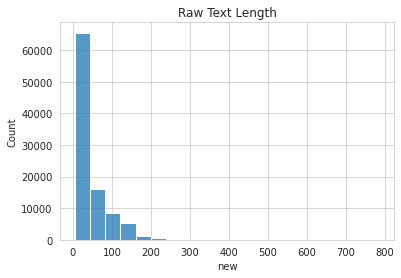

In [ ]:
#plotting the length of words e to find out at what length we can shorten the sentences. We decided on a length of 50. We assume that longer sentences do not contain any additional information.
sns.histplot(df['new'].apply(lambda x: len(x.split())), bins = 20)
plt.title('Raw Text Length')

Text(0.5, 1.0, 'Clean Text Length')

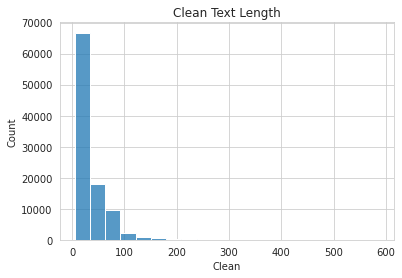

In [ ]:
sns.histplot(df['Clean'].apply(lambda x: len(x.split())), bins = 20)
plt.title('Clean Text Length')

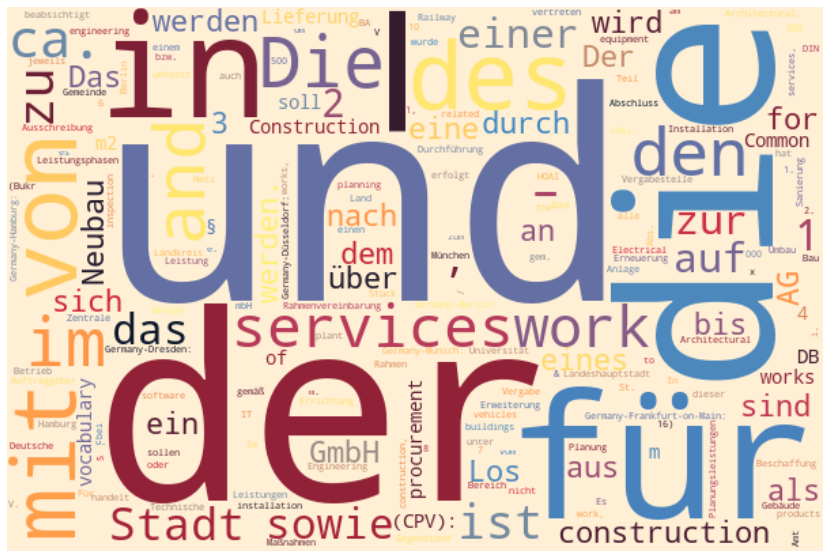

In [ ]:
#those are the most common words without deleting stopwords
hero.wordcloud(df['new'], max_words=200, height=400, width=600)

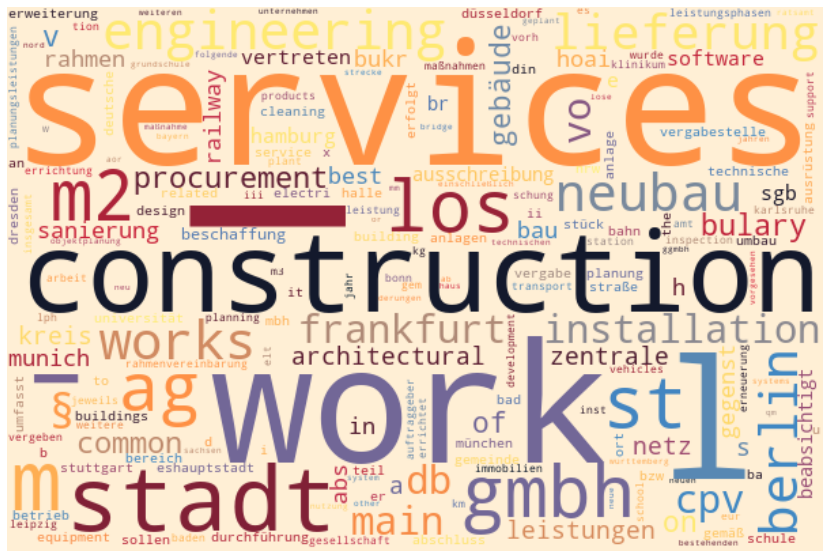

In [ ]:
#those are the most common words with deleting stopwords
hero.wordcloud(df['Clean'], max_words=200, height=400, width=600)

#Building the model

In [ ]:
from sklearn.metrics import jaccard_score, classification_report, roc_auc_score, f1_score, hamming_loss, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(analyzer='word', min_df=10)
X = tfidf.fit_transform(X['Clean'])

In [ ]:
X.shape

(98320, 22695)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
for classifier in [LinearSVC(C=1.5, penalty = 'l1', dual=False)]:
  clf = OneVsRestClassifier(classifier, n_jobs =-1)
  clf.fit(X_train, y_train)
  y_pred_SVM = clf.predict(X_test)

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_SVM)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_SVM, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_SVM)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_SVM,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_SVM,average='macro')}")

SVM_roc = roc_auc_score(y_test, y_pred_SVM)
SVM_jac = jaccard_score(y_test, y_pred_SVM, average='micro')
SVM_ham = hamming_loss(y_test, y_pred_SVM)
SVM_micro = f1_score(y_test, y_pred_SVM,average='micro')
SVM_macro = f1_score(y_test, y_pred_SVM,average='macro')

AUC Score:      0.9242925866712142
Jaccard Score:  0.9007550752814577
Hamming Loss:   0.012402811680679866
F1-Micro    :   0.9477865791289041
F1-Macro    :   0.8994511292059845


In [ ]:
print(classification_report(y_test, y_pred_SVM, target_names=multilabel.classes_))

                               precision    recall  f1-score   support

                      Defence       0.90      0.70      0.79       448
          Education & Culture       0.97      0.84      0.90       691
         Energy & Environment       0.97      0.89      0.93      1601
                      General       0.92      0.78      0.84      1828
                Health & Care       0.97      0.88      0.93      1256
Infrastructure & Construction       0.99      0.98      0.99     11732
        Professional Services       0.95      0.87      0.91      1573
  Technology & Communications       0.93      0.79      0.86       932
        Transport & Logistics       0.98      0.93      0.95      1549

                    micro avg       0.98      0.92      0.95     21610
                    macro avg       0.95      0.85      0.90     21610
                 weighted avg       0.97      0.92      0.95     21610
                  samples avg       0.96      0.95      0.95     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



# Implement the models

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set_style("whitegrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
import gensim
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import keras.backend as K 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional, Dropout, GRU, Input
from keras.layers import Dense,Conv1D,MaxPooling1D, Flatten, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Sequential
from keras import metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import jaccard_score, classification_report, roc_auc_score, f1_score, hamming_loss
import pickle

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Clean'], df.iloc[:,5:], test_size = 0.2, random_state = 0)

In [ ]:
# Tokenize Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=75) 
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=75)

In [ ]:
size_of_vocabulary = len(tokenizer.word_index)+1

In [ ]:
with open('L_tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
#Building a function for the plotting the metrics
def metric_graph(history):
  for i in ['accuracy']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training')
    plt.plot(epochs, val_acc, label= 'Validation')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()


def loss_graph(history):
  for i in ['loss']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

#Random Test

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D
model_test = Sequential()

model_test.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100))
model_test.add(GlobalAveragePooling1D())

model_test.add(Dense(100, activation='sigmoid'))
model_test.add(Dense(60, activation='sigmoid'))
model_test.add(Dropout(0.2))

model_test.add(Dense(9, activation='sigmoid'))

model_test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         13291400  
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 549       
Total params: 13,308,109
Trainable params: 13,308,109
Non-trainable params: 0
__________________________________________

In [ ]:
for layer in model_test.layers:
    print(layer.output_shape)

(None, None, 100)
(None, 100)
(None, 100)
(None, 60)
(None, 60)
(None, 9)


In [ ]:
model_test.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_test = model_test.fit(X_train_seq_padded, y_train, batch_size=512, epochs=20, validation_data=(X_test_seq_padded, y_test), verbose = 1)

Epoch 1/20
154/154 [==============================] - 22s 137ms/step - loss: 0.4161 - accuracy: 0.4159 - val_loss: 0.2780 - val_accuracy: 0.5631
Epoch 2/20
154/154 [==============================] - 21s 137ms/step - loss: 0.2808 - accuracy: 0.5688 - val_loss: 0.2448 - val_accuracy: 0.5631
Epoch 3/20
154/154 [==============================] - 21s 136ms/step - loss: 0.2267 - accuracy: 0.5813 - val_loss: 0.1900 - val_accuracy: 0.6137
Epoch 4/20
154/154 [==============================] - 21s 136ms/step - loss: 0.1890 - accuracy: 0.6205 - val_loss: 0.1826 - val_accuracy: 0.6297
Epoch 5/20
154/154 [==============================] - 21s 136ms/step - loss: 0.1800 - accuracy: 0.6350 - val_loss: 0.1776 - val_accuracy: 0.6559
Epoch 6/20
154/154 [==============================] - 21s 135ms/step - loss: 0.1733 - accuracy: 0.6577 - val_loss: 0.1710 - val_accuracy: 0.6733
Epoch 7/20
154/154 [==============================] - 21s 136ms/step - loss: 0.1651 - accuracy: 0.6785 - val_loss: 0.1640 - val_ac

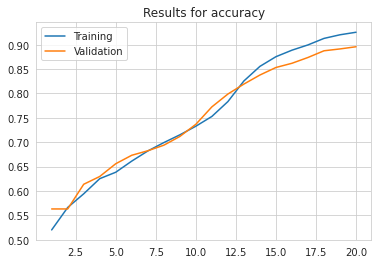

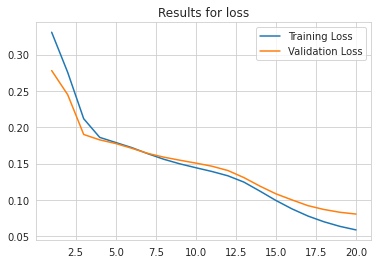

In [ ]:
metric_graph(history_test)
loss_graph(history_test)

In [ ]:
y_pred_dense=model_test.predict(X_test_seq_padded).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_dense)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_dense, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_dense)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_dense,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_dense,average='macro')}")

DD_roc = roc_auc_score(y_test, y_pred_dense)
DD_jac = jaccard_score(y_test, y_pred_dense, average='micro')
DD_ham = hamming_loss(y_test, y_pred_dense)
DD_micro = f1_score(y_test, y_pred_dense,average='micro')
DD_macro = f1_score(y_test, y_pred_dense,average='macro')

AUC Score:      0.8378736598192945
Jaccard Score:  0.8264764876309338
Hamming Loss:   0.021997332971702376
F1-Micro    :   0.9049954852722257
F1-Macro    :   0.7424474161595063


In [ ]:
col_labels = ['Defence', 'Education & Culture', 'Energy & Environment',
       'General', 'Health & Care', 'Infrastructure & Construction',
       'Professional Services', 'Technology & Communications',
       'Transport & Logistics']
print(classification_report(y_test, y_pred_dense,target_names=col_labels))

                               precision    recall  f1-score   support

                      Defence       0.00      0.00      0.00       448
          Education & Culture       0.96      0.64      0.77       691
         Energy & Environment       0.94      0.84      0.89      1601
                      General       0.90      0.67      0.77      1828
                Health & Care       0.90      0.76      0.82      1256
Infrastructure & Construction       0.98      0.98      0.98     11732
        Professional Services       0.91      0.77      0.83      1573
  Technology & Communications       0.87      0.61      0.72       932
        Transport & Logistics       0.94      0.87      0.91      1549

                    micro avg       0.96      0.86      0.90     21610
                    macro avg       0.82      0.68      0.74     21610
                 weighted avg       0.93      0.86      0.89     21610
                  samples avg       0.93      0.90      0.91     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
model_test.save('Model_Dense.h5')

# CNN Model

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D
model_CNN = Sequential()
#model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
model_CNN.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100))
model_CNN.add(Conv1D(100,4,padding='same',activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
#model.add(Dropout(0.2))
model_CNN.add(Flatten())
model_CNN.add(Dense(9, activation='sigmoid'))

model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         13291400  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 100)         40100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 909       
Total params: 13,332,409
Trainable params: 13,332,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_CNN.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_CNN = model_CNN.fit(X_train_seq_padded, y_train, batch_size=512, epochs=7, #from 7 on it starts overfitting
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

Epoch 1/7
154/154 [==============================] - 22s 138ms/step - loss: 0.4109 - accuracy: 0.5027 - val_loss: 0.1082 - val_accuracy: 0.8620
Epoch 2/7
154/154 [==============================] - 21s 137ms/step - loss: 0.0862 - accuracy: 0.8867 - val_loss: 0.0608 - val_accuracy: 0.9189
Epoch 3/7
154/154 [==============================] - 21s 137ms/step - loss: 0.0474 - accuracy: 0.9326 - val_loss: 0.0479 - val_accuracy: 0.9302
Epoch 4/7
154/154 [==============================] - 21s 136ms/step - loss: 0.0316 - accuracy: 0.9425 - val_loss: 0.0419 - val_accuracy: 0.9338
Epoch 5/7
154/154 [==============================] - 21s 136ms/step - loss: 0.0206 - accuracy: 0.9473 - val_loss: 0.0388 - val_accuracy: 0.9338
Epoch 6/7
154/154 [==============================] - 21s 137ms/step - loss: 0.0142 - accuracy: 0.9465 - val_loss: 0.0379 - val_accuracy: 0.9342
Epoch 7/7
154/154 [==============================] - 21s 137ms/step - loss: 0.0090 - accuracy: 0.9484 - val_loss: 0.0384 - val_accuracy:

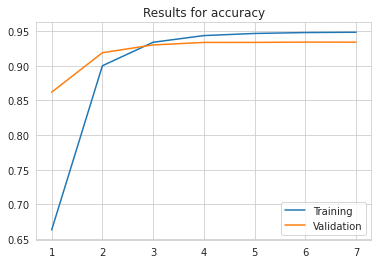

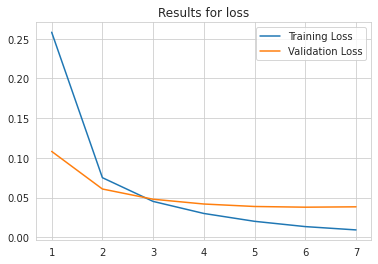

In [ ]:
metric_graph(history_CNN)
loss_graph(history_CNN)

In [ ]:
y_pred_CNN=model_CNN.predict(X_test_seq_padded).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_CNN)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_CNN, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_CNN)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_CNN,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_CNN,average='macro')}")

CNN_roc = roc_auc_score(y_test, y_pred_CNN)
CNN_jac = jaccard_score(y_test, y_pred_CNN, average='micro')
CNN_ham = hamming_loss(y_test, y_pred_CNN)
CNN_micro = f1_score(y_test, y_pred_CNN,average='micro')
CNN_macro = f1_score(y_test, y_pred_CNN,average='macro')

AUC Score:      0.9405612950650212
Jaccard Score:  0.9209584635593604
Hamming Loss:   0.00986009402404846
F1-Micro    :   0.9588530736400291
F1-Macro    :   0.9208322462212831


In [ ]:
print(classification_report(y_test, y_pred_CNN,target_names=col_labels ))

                               precision    recall  f1-score   support

                      Defence       0.91      0.73      0.81       448
          Education & Culture       0.97      0.89      0.93       691
         Energy & Environment       0.96      0.93      0.95      1601
                      General       0.95      0.84      0.89      1828
                Health & Care       0.98      0.91      0.94      1256
Infrastructure & Construction       0.99      0.99      0.99     11732
        Professional Services       0.95      0.92      0.93      1573
  Technology & Communications       0.96      0.83      0.89       932
        Transport & Logistics       0.98      0.94      0.96      1549

                    micro avg       0.98      0.94      0.96     21610
                    macro avg       0.96      0.88      0.92     21610
                 weighted avg       0.98      0.94      0.96     21610
                  samples avg       0.97      0.96      0.96     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
model_CNN.save('Model_CNN.h5')

#LSTM

In [ ]:
model_LSTM = Sequential()
#model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
model_LSTM.add(Embedding(input_dim = size_of_vocabulary, output_dim = 128))
model_LSTM.add(LSTM(64,return_sequences=False))
#model.add(LSTM(32))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(9, activation='sigmoid'))
model_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         17012992  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 585       
Total params: 17,062,985
Trainable params: 17,062,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_seq_padded, y_train, batch_size=512, epochs=10,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

Epoch 1/10
154/154 [==============================] - 29s 177ms/step - loss: 0.4080 - accuracy: 0.5293 - val_loss: 0.1878 - val_accuracy: 0.6468
Epoch 2/10
154/154 [==============================] - 26s 169ms/step - loss: 0.1820 - accuracy: 0.6494 - val_loss: 0.1464 - val_accuracy: 0.7852
Epoch 3/10
154/154 [==============================] - 26s 170ms/step - loss: 0.1288 - accuracy: 0.8123 - val_loss: 0.1006 - val_accuracy: 0.8595
Epoch 4/10
154/154 [==============================] - 26s 169ms/step - loss: 0.0855 - accuracy: 0.8884 - val_loss: 0.0886 - val_accuracy: 0.8733
Epoch 5/10
154/154 [==============================] - 26s 170ms/step - loss: 0.0632 - accuracy: 0.9157 - val_loss: 0.0710 - val_accuracy: 0.9004
Epoch 6/10
154/154 [==============================] - 26s 168ms/step - loss: 0.0475 - accuracy: 0.9331 - val_loss: 0.0594 - val_accuracy: 0.9166
Epoch 7/10
154/154 [==============================] - 26s 170ms/step - loss: 0.0396 - accuracy: 0.9373 - val_loss: 0.0567 - val_ac

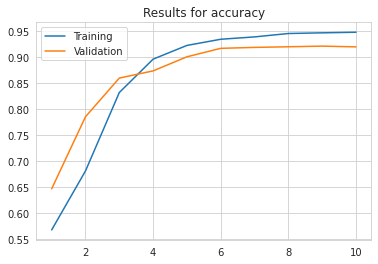

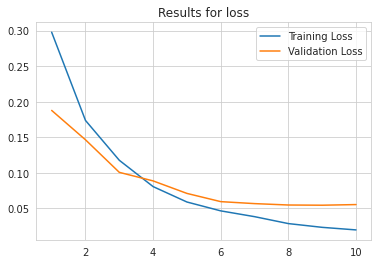

In [ ]:
metric_graph(history_LSTM)
loss_graph(history_LSTM)

In [ ]:
y_pred_LSTM=model_LSTM.predict(X_test_seq_padded).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_LSTM)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_LSTM, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_LSTM)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_LSTM,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_LSTM,average='macro')}")

LSTM_roc = roc_auc_score(y_test, y_pred_LSTM)
LSTM_jac = jaccard_score(y_test, y_pred_LSTM, average='micro')
LSTM_ham = hamming_loss(y_test, y_pred_LSTM)
LSTM_micro = f1_score(y_test, y_pred_LSTM,average='micro')
LSTM_macro = f1_score(y_test, y_pred_LSTM,average='macro')

AUC Score:      0.9211969581566782
Jaccard Score:  0.8897735865842267
Hamming Loss:   0.014001898562516952
F1-Micro    :   0.941672158930421
F1-Macro    :   0.8851326459520817


In [ ]:
print(classification_report(y_test, y_pred_LSTM,target_names=col_labels ))

                               precision    recall  f1-score   support

                      Defence       0.88      0.62      0.73       448
          Education & Culture       0.89      0.82      0.86       691
         Energy & Environment       0.97      0.89      0.93      1601
                      General       0.90      0.80      0.84      1828
                Health & Care       0.93      0.89      0.91      1256
Infrastructure & Construction       0.98      0.98      0.98     11732
        Professional Services       0.91      0.91      0.91      1573
  Technology & Communications       0.93      0.81      0.87       932
        Transport & Logistics       0.97      0.92      0.94      1549

                    micro avg       0.96      0.93      0.94     21610
                    macro avg       0.93      0.85      0.89     21610
                 weighted avg       0.96      0.93      0.94     21610
                  samples avg       0.97      0.95      0.95     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
model_LSTM.save('model_LSTM.h5')

#GRU

In [ ]:
model_GRU = Sequential()
#model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
model_GRU.add(Embedding(input_dim = size_of_vocabulary, output_dim = 128))
model_GRU.add(GRU(64,return_sequences=False))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(9, activation='sigmoid'))
model_GRU.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         17012992  
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 585       
Total params: 17,050,825
Trainable params: 17,050,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_GRU.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_GRU = model_GRU.fit(X_train_seq_padded, y_train, batch_size=512, epochs=10,
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

Epoch 1/10
154/154 [==============================] - 28s 168ms/step - loss: 0.4255 - accuracy: 0.5094 - val_loss: 0.2056 - val_accuracy: 0.6150
Epoch 2/10
154/154 [==============================] - 26s 168ms/step - loss: 0.1831 - accuracy: 0.6616 - val_loss: 0.1377 - val_accuracy: 0.8067
Epoch 3/10
154/154 [==============================] - 26s 168ms/step - loss: 0.1172 - accuracy: 0.8367 - val_loss: 0.0814 - val_accuracy: 0.8979
Epoch 4/10
154/154 [==============================] - 26s 167ms/step - loss: 0.0672 - accuracy: 0.9160 - val_loss: 0.0632 - val_accuracy: 0.9149
Epoch 5/10
154/154 [==============================] - 25s 165ms/step - loss: 0.0461 - accuracy: 0.9335 - val_loss: 0.0563 - val_accuracy: 0.9193
Epoch 6/10
154/154 [==============================] - 26s 166ms/step - loss: 0.0337 - accuracy: 0.9409 - val_loss: 0.0515 - val_accuracy: 0.9250
Epoch 7/10
154/154 [==============================] - 25s 164ms/step - loss: 0.0250 - accuracy: 0.9458 - val_loss: 0.0496 - val_ac

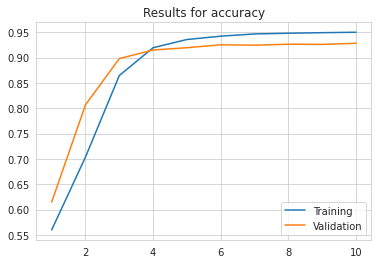

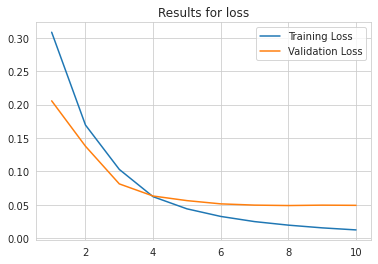

In [ ]:
metric_graph(history_GRU)
loss_graph(history_GRU)

In [ ]:
y_pred_GRU=model_GRU.predict(X_test_seq_padded).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_GRU)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_GRU, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_GRU)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_GRU,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_GRU,average='macro')}")

GRU_roc = roc_auc_score(y_test, y_pred_GRU)
GRU_jac = jaccard_score(y_test, y_pred_GRU, average='micro')
GRU_ham = hamming_loss(y_test, y_pred_GRU)
GRU_micro = f1_score(y_test, y_pred_GRU,average='micro')
GRU_macro = f1_score(y_test, y_pred_GRU,average='macro')

AUC Score:      0.9368984113239939
Jaccard Score:  0.9056789240873956
Hamming Loss:   0.011928171051442003
F1-Micro    :   0.9505052636514971
F1-Macro    :   0.9090545275470823


In [ ]:
print(classification_report(y_test, y_pred_GRU,target_names=col_labels ))

                               precision    recall  f1-score   support

                      Defence       0.88      0.70      0.78       448
          Education & Culture       0.96      0.87      0.91       691
         Energy & Environment       0.96      0.92      0.94      1601
                      General       0.90      0.85      0.87      1828
                Health & Care       0.96      0.91      0.94      1256
Infrastructure & Construction       0.98      0.98      0.98     11732
        Professional Services       0.93      0.91      0.92      1573
  Technology & Communications       0.93      0.84      0.88       932
        Transport & Logistics       0.98      0.94      0.96      1549

                    micro avg       0.96      0.94      0.95     21610
                    macro avg       0.94      0.88      0.91     21610
                 weighted avg       0.96      0.94      0.95     21610
                  samples avg       0.97      0.96      0.96     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
 #model_GRU.save('model_GRU.h5')

#BI-LSTM

In [ ]:
model_BISTM = Sequential()

model_BISTM.add(Embedding(input_dim = size_of_vocabulary, output_dim = 128))
model_BISTM.add(Bidirectional(LSTM(64,return_sequences=False)))
model_BISTM.add(Dropout(0.2))
model_BISTM.add(Dense(9, activation='sigmoid'))
model_BISTM.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         17012992  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 9)                 1161      
Total params: 17,112,969
Trainable params: 17,112,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_BISTM.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_BILSTM = model_BISTM.fit(X_train_seq_padded, y_train, batch_size=32, epochs=3, #from 3 on it is overfitting
                         validation_data=(X_test_seq_padded, y_test), verbose = 1)

Epoch 1/3
2458/2458 [==============================] - 389s 157ms/step - loss: 0.1895 - accuracy: 0.7040 - val_loss: 0.0698 - val_accuracy: 0.9037
Epoch 2/3
2458/2458 [==============================] - 385s 157ms/step - loss: 0.0571 - accuracy: 0.9192 - val_loss: 0.0564 - val_accuracy: 0.9167
Epoch 3/3
2458/2458 [==============================] - 386s 157ms/step - loss: 0.0333 - accuracy: 0.9401 - val_loss: 0.0498 - val_accuracy: 0.9235


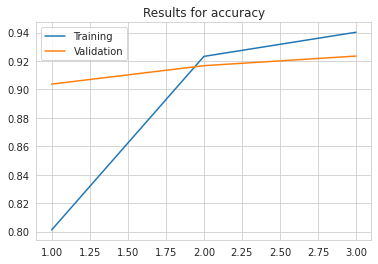

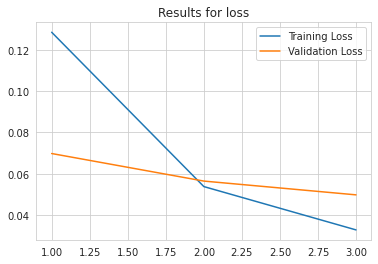

In [ ]:
metric_graph(history_BILSTM)
loss_graph(history_BILSTM)

In [ ]:
y_pred_BILSTM=model_BISTM.predict(X_test_seq_padded).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(y_test, y_pred_BILSTM)}")
print(f"Jaccard Score:  {jaccard_score(y_test, y_pred_BILSTM, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(y_test, y_pred_BILSTM)}")
print(f"F1-Micro    :   {f1_score(y_test, y_pred_BILSTM,average='micro')}")
print(f"F1-Macro    :   {f1_score(y_test, y_pred_BILSTM,average='macro')}")

BILSTM_roc = roc_auc_score(y_test, y_pred_BILSTM)
BILSTM_jac = jaccard_score(y_test, y_pred_BILSTM, average='micro')
BILSTM_ham = hamming_loss(y_test, y_pred_BILSTM)
BILSTM_micro = f1_score(y_test, y_pred_BILSTM,average='micro')
BILSTM_macro = f1_score(y_test, y_pred_BILSTM,average='macro')

AUC Score:      0.919165600071375
Jaccard Score:  0.8918567067696175
Hamming Loss:   0.013612015188500136
F1-Micro    :   0.942837481906841
F1-Macro    :   0.8869471165755729


In [ ]:
print(classification_report(y_test, y_pred_BILSTM,target_names=col_labels))

                               precision    recall  f1-score   support

                      Defence       0.83      0.65      0.73       448
          Education & Culture       0.94      0.81      0.87       691
         Energy & Environment       0.95      0.89      0.92      1601
                      General       0.93      0.79      0.85      1828
                Health & Care       0.96      0.88      0.92      1256
Infrastructure & Construction       0.99      0.98      0.98     11732
        Professional Services       0.96      0.86      0.91      1573
  Technology & Communications       0.92      0.82      0.86       932
        Transport & Logistics       0.96      0.92      0.94      1549

                    micro avg       0.97      0.92      0.94     21610
                    macro avg       0.94      0.84      0.89     21610
                 weighted avg       0.97      0.92      0.94     21610
                  samples avg       0.97      0.95      0.95     21610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
model_BISTM.save('model_BISTM.h5')

# BERT

In [ ]:
!pip install transformers
!pip install tensorflow==2.1.0
!pip install tensorflow-gpu


     |████████████████████████████████| 2.2MB 7.4MB/s 
     |████████████████████████████████| 870kB 38.9MB/s 
     |████████████████████████████████| 3.3MB 46.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=8d8f72cb548fee362ffe012ab09318523f2a7423ca88d60af9ccf3d13ff787ac
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses
     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 450kB 53.0MB/s 
     |████████████████████████████████| 3.9MB 48.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=ffb3cef205e60ae56f4c2d05bc7550d9e931efda7087e51526644f036d9a98c8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1

     |████████████████████████████████| 394.3MB 46kB/s 
     |████████████████████████████████| 10.6MB 50.1MB/s 
     |████████████████████████████████| 471kB 53.2MB/s 
ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.4.1 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0


In [ ]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import TFBertModel
from tensorflow.keras.layers import Dense, Flatten
import time
from transformers import create_optimizer
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle


In [ ]:
#Initialize Bert tokenizer and masks
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences

#bert_model_name = "dbmdz/bert-base-german-uncased"
bert_model_name = "bert-base-german-cased"
#bert_model_name = 'bert-base-multilingual-uncased'

tokenizer_BERT = BertTokenizer.from_pretrained(bert_model_name)
MAX_LEN = 128

def tokenize_sentences(sentences, tokenizer, max_seq_len = 128):
    tokenized_sentences = []

    for sentence in tqdm(sentences):
        tokenized_sentence = tokenizer_BERT.encode(
                            sentence,                  # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_seq_len,  # Truncate all sentences.
                    )
        
        tokenized_sentences.append(tokenized_sentence)

    return tokenized_sentences

def create_attention_masks(tokenized_and_padded_sentences):
    attention_masks = []

    for sentence in tokenized_and_padded_sentences:
        att_mask = [int(token_id > 0) for token_id in sentence]
        attention_masks.append(att_mask)

    return np.asarray(attention_masks)

input_ids = tokenize_sentences(df2['new'], tokenizer, MAX_LEN)
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
attention_masks = create_attention_masks(input_ids)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
from sklearn.model_selection import train_test_split


labels =  df2[col_labels].values
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=0, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, random_state=0, test_size=0.1)

train_size = len(train_inputs)
validation_size = len(validation_inputs)

In [ ]:
#Create train and validation datasets
BATCH_SIZE=32 
NR_EPOCHS=1
def create_dataset(data_tuple, epochs=1, batch_size=32, buffer_size=10000, train=True):
    dataset = tf.data.Dataset.from_tensor_slices(data_tuple)
    if train:
        dataset = dataset.shuffle(buffer_size=buffer_size)
    dataset = dataset.repeat(epochs)
    dataset = dataset.batch(batch_size)
    if train:
        dataset = dataset.prefetch(1)
    
    return dataset

train_dataset = create_dataset((train_inputs, train_masks, train_labels), epochs=NR_EPOCHS, batch_size=BATCH_SIZE)
validation_dataset = create_dataset((validation_inputs, validation_masks, validation_labels), epochs=NR_EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
from transformers import TFBertModel

from tensorflow.keras.layers import Dense, Flatten

class BertClassifier(tf.keras.Model):    
        def __init__(self, bert: TFBertModel, num_classes: int):
            super().__init__()
            self.bert = bert
            self.classifier = Dense(num_classes, activation='sigmoid')

        @tf.function
        def call(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None):
            outputs = self.bert(input_ids,
                                   attention_mask=attention_mask,
                                   token_type_ids=token_type_ids,
                                   position_ids=position_ids,
                                   head_mask=head_mask)
            cls_output = outputs[1]
            cls_output = self.classifier(cls_output)

            return cls_output
    
model = BertClassifier(TFBertModel.from_pretrained(bert_model_name), len(col_labels))

Some layers from the model checkpoint at bert-base-german-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-german-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
import time
from transformers import create_optimizer
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle


lw = 2
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = validation_size // BATCH_SIZE

# | Loss Function
loss_object = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
train_loss = tf.keras.metrics.Mean(name='train_loss')
validation_loss = tf.keras.metrics.Mean(name='test_loss')

# | Optimizer 
warmup_steps = steps_per_epoch // 3
total_steps = steps_per_epoch * NR_EPOCHS - warmup_steps
optimizer = tf.keras.optimizers.Adam(lr=2e-5)

# | Metrics
train_auc_metrics = [tf.keras.metrics.AUC() for i in range(len(col_labels))]
validation_auc_metrics = [tf.keras.metrics.AUC() for i in range(len(col_labels))]

@tf.function
def train_step(model, token_ids, masks, labels):
    labels = tf.dtypes.cast(labels, tf.float32)
    
    with tf.GradientTape() as tape:
        predictions = model(token_ids, attention_mask=masks)
        loss = loss_object(labels, predictions)
    #Loss Function into gradient
    gradients = tape.gradient(loss, model.trainable_variables)
    #Apply gradient to optimizer
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

    for i, auc in enumerate(train_auc_metrics):
        auc.update_state(labels[:,i], predictions[:,i])
        
@tf.function
def validation_step(model, token_ids, masks, labels):
    labels = tf.dtypes.cast(labels, tf.float32)

    predictions = model(token_ids, attention_mask=masks, training=False)
    v_loss = loss_object(labels, predictions)

    validation_loss(v_loss)
    for i, auc in enumerate(validation_auc_metrics):
        auc.update_state(labels[:,i], predictions[:,i])
        
fpr = dict()
tpr = dict()
roc_auc = dict()
n_class = 9

        
def train(model, train_dataset, val_dataset, train_steps_per_epoch, val_steps_per_epoch, epochs):
    for epoch in range(epochs):
        print('=' * 50, f"EPOCH {epoch+1}", '=' * 50)

        start = time.time()

        for i, (token_ids, masks, labels) in enumerate(tqdm(train_dataset, total=train_steps_per_epoch)):
            train_step(model, token_ids, masks, labels)
            if i % 500 == 0:
                print(f'\nTrain Step: {i}, Loss: {train_loss.result()}')
                for i, label_name in enumerate(col_labels):
                    print(f"{label_name} roc_auc {train_auc_metrics[i].result()}")
                    train_auc_metrics[i].reset_states()

        for i, (token_ids, masks, labels) in enumerate(tqdm(val_dataset, total=val_steps_per_epoch)):
            validation_step(model, token_ids, masks, labels)

        print(f'\nEpoch {epoch+1}, Validation Loss: {validation_loss.result()}, Time: {time.time()-start}\n')

        for i, label_name in enumerate(col_labels):
            print(f"{label_name} roc_auc {validation_auc_metrics[i].result()}")
            validation_auc_metrics[i].reset_states()

        print('\n')
    


train(model, train_dataset, validation_dataset, steps_per_epoch, validation_steps, NR_EPOCHS)

================================================== EPOCH 1 ==================================================



Train Step: 0, Loss: 0.0500091090798378
Defence roc_auc 0.0
Education & Culture roc_auc 1.0
Energy & Environment roc_auc 1.0
General roc_auc 0.9629629850387573
Health & Care roc_auc 1.0
Infrastructure & Construction roc_auc 0.9999999403953552
Professional Services roc_auc 1.0
Technology & Communications roc_auc 1.0
Transport & Logistics roc_auc 1.0

Train Step: 500, Loss: 0.034425027668476105
Defence roc_auc 0.9830480217933655
Education & Culture roc_auc 0.9853567481040955
Energy & Environment roc_auc 0.9884536862373352
General roc_auc 0.9779238104820251
Health & Care roc_auc 0.9943165183067322
Infrastructure & Construction roc_auc 0.9980530142784119
Professional Services roc_auc 0.9928134679794312
Technology & Communications roc_auc 0.9866717457771301
Transport & Logistics roc_auc 0.9946357011795044

Train Step: 1000, Loss: 0.03168048337101936
Defence roc_auc 0.982716977596283
Education & Culture roc_auc 0.9889422059059143
Energy & Environment roc_auc 0.9944573640823364
General roc_a



Epoch 1, Validation Loss: 0.03476300463080406, Time: 1263.1091613769531

Defence roc_auc 0.9760806560516357
Education & Culture roc_auc 0.9822700619697571
Energy & Environment roc_auc 0.9891461730003357
General roc_auc 0.97885662317276
Health & Care roc_auc 0.9879546165466309
Infrastructure & Construction roc_auc 0.996821403503418
Professional Services roc_auc 0.9918783903121948
Technology & Communications roc_auc 0.9880466461181641
Transport & Logistics roc_auc 0.9944664239883423




In [ ]:
BERT_valid=model.predict([validation_inputs, validation_masks],batch_size=32).round()

In [ ]:
print(f"AUC Score:      {roc_auc_score(validation_labels, BERT_valid)}")
print(f"Jaccard Score:  {jaccard_score(validation_labels, BERT_valid, average='micro')}")
print(f"Hamming Loss:   {hamming_loss(validation_labels, BERT_valid)}")
print(f"F1-Micro    :   {f1_score(validation_labels, BERT_valid,average='micro')}")
print(f"F1-Macro    :   {f1_score(validation_labels, BERT_valid,average='macro')}")

BERT_roc = roc_auc_score(validation_labels, BERT_valid)
BERT_jac = jaccard_score(validation_labels, BERT_valid, average='micro')
BERT_ham = hamming_loss(validation_labels, BERT_valid)
BERT_micro = f1_score(validation_labels, BERT_valid,average='micro')
BERT_macro = f1_score(validation_labels, BERT_valid,average='macro')

AUC Score:      0.9453823950421112
Jaccard Score:  0.920972097209721
Hamming Loss:   0.009922249344543893
F1-Micro    :   0.9588604629369318
F1-Macro    :   0.9210516702014719


In [ ]:
print(classification_report(validation_labels, BERT_valid,target_names=col_labels ))

                               precision    recall  f1-score   support

                      Defence       0.92      0.75      0.83       221
          Education & Culture       0.97      0.88      0.92       370
         Energy & Environment       0.95      0.93      0.94       816
                      General       0.92      0.85      0.88       918
                Health & Care       0.97      0.92      0.94       619
Infrastructure & Construction       1.00      0.98      0.99      5866
        Professional Services       0.98      0.91      0.94       814
  Technology & Communications       0.89      0.86      0.88       484
        Transport & Logistics       0.97      0.96      0.96       737

                    micro avg       0.97      0.94      0.96     10845
                    macro avg       0.95      0.89      0.92     10845
                 weighted avg       0.97      0.94      0.96     10845
                  samples avg       0.98      0.97      0.97     10845



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
tf.saved_model.save(model, export_dir='path/modelBERT')

# Results

In [ ]:
results = pd.DataFrame(index = ['Dense', 'CNN', 'LSTM','GRU','BILSTM',"SVM", "BERT"])

results['Kaggle'] = [0.85120, 0.90729, 0.90820, 0.90591, 0.90180, 0.91324, 0.94995]
results['AUC Score'] = [DD_roc, CNN_roc,LSTM_roc,GRU_roc,BILSTM_roc,SVM_roc,BERT_roc]
results['Jaccard Score'] = [DD_jac,CNN_jac,LSTM_jac,GRU_jac,BILSTM_jac,SVM_jac,BERT_jac]
results['Hamming Loss'] = [DD_ham,CNN_ham,LSTM_ham,GRU_ham,BILSTM_ham,SVM_ham,BERT_ham]
results['F1-Micro'] = [DD_micro,CNN_micro,LSTM_micro,GRU_micro,BILSTM_micro,SVM_micro,BERT_micro]
results['F1-Macro'] = [DD_macro,CNN_macro,LSTM_macro,GRU_macro,BILSTM_macro,SVM_macro,BERT_macro]
results

,Kaggle,AUC Score,Jaccard Score,Hamming Loss,F1-Micro,F1-Macro
Dense,0.85120,0.837874,0.826476,0.021997,0.904995,0.742447
CNN,0.90729,0.940561,0.920958,0.009860,0.958853,0.920832
LSTM,0.90820,0.921197,0.889774,0.014002,0.941672,0.885133
GRU,0.90591,0.936898,0.905679,0.011928,0.950505,0.909055
BILSTM,0.90180,0.919166,0.891857,0.013612,0.942837,0.886947
SVM,0.91324,0.924293,0.900755,0.012403,0.947787,0.899451
BERT,0.94995,0.945382,0.920972,0.009922,0.958860,0.921052


#Testing on unseen Kaggle data

### Preprocessing DD, CNN, GRU, BILSTM, LSTM Kaggle Test Data

In [ ]:
test['new'] = test[col].astype(str).apply(' '.join, axis=1)
test.head()

,docid,publication_date,contract_type,nature_of_contract,country_code,country_name,sector,value,title,description,awarding_authority,new
0,2535443526,2020-11-13,notice,services,DE,Germany,public,NaN,Germany-Stuttgart: Software-related services,Pflege und Anpassung SKoKa-BW (1.1.2021-31.12....,"Regierungspräsidium Tübingen, Abteilung 9 — La...",Germany-Stuttgart: Software-related services P...
1,2487195007,2020-10-09,notice,services,DE,Germany,public,NaN,"Germany-Mühlacker: Architectural, construction...",Vergabeverfahren der Stadt Mühlacker zur Verga...,Stadtverwaltung Mühlacker,"Germany-Mühlacker: Architectural, construction..."
2,2573583192,2020-12-11,notice,supplies,DE,Germany,public,NaN,Germany-Darmstadt: Integrated circuit packages,Für die Gruppe HEL der Abteilung ACO werden fü...,GSI Helmholtzzentrum für Schwerionenforschung ...,Germany-Darmstadt: Integrated circuit packages...
3,2213029015,2020-02-19,notice,works,DE,Germany,public,NaN,Germany-Penzberg: Construction work for swimmi...,Stahlbauarbeiten inkl. Trapezblecharbeiten bei...,Stadtwerke Penzberg,Germany-Penzberg: Construction work for swimmi...
4,2218957610,2020-02-24,notice,services,DE,Germany,public,NaN,Germany-Weißenthurm: Architectural design serv...,Die Verbandsgemeinde Weißenthurm ist Trägerin ...,Verbandsgemeinde Weißenthurm,Germany-Weißenthurm: Architectural design serv...


In [ ]:
test['Clean']= test['new'].apply(lambda x: clean_des(x))
test['Clean']= hero.remove_digits(test['Clean'])
test['Clean']= hero.remove_punctuation(test['Clean'])

In [ ]:
test_pre = tokenizer.texts_to_sequences(test['Clean'])

In [ ]:
test_1 = pad_sequences(test_pre, maxlen=50)

### Preprocessing SVM Kaggle Test Data

In [ ]:
test_data = tfidf.transform(test['Clean'])

### Preprocessing BERT Kaggle Test Data

In [ ]:
test_input_ids = tokenize_sentences(test['new'], tokenizer_BERT, MAX_LEN)
test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
test_attention_masks = create_attention_masks(test_input_ids)

### Predictions Kaggle

In [ ]:
BERT_predictions = model.predict([test_input_ids, test_attention_masks],batch_size=32).round()
y_pred_CNN= model_CNN.predict(test_1).round()
y_pred_LSTM= model_LSTM.predict(test_1).round()
y_pred_Dense= model_test.predict(test_1).round()
y_pred_GRU= model_GRU.predict(test_1).round()
y_pred_BILSTM= model_BISTM.predict(test_1).round()
prediction_svm = clf.predict(test_data).round()

In [ ]:
file = ['y_pred_CNN', 'y_pred_LSTM', 'y_pred_Dense', 'y_pred_GRU', 'y_pred_BILSTM',"BERT_predictions",'prediction_svm']
results = [y_pred_CNN, y_pred_LSTM, y_pred_Dense, y_pred_GRU, y_pred_BILSTM, BERT_predictions, prediction_svm]
cols=['General', 'Defence', 'Education & Culture', 'Energy & Environment','Health & Care', 'Infrastructure & Construction', 'Professional Services', 'Technology & Communications', "Transport & Logistics"]

for x in range(len(results)):
    dataframe = pd.DataFrame(results[x], columns = multilabel.classes_)
    dataframe = dataframe.astype(int)
    dataframe ['docid'] = test['docid'] 
    dataframe ['label']= dataframe[cols].astype(str).apply(''.join, axis=1)
    dataframe = dataframe[['docid', 'label']]
    dataframe.to_csv(f'{file[x]}_results.csv', index = False)
    